In [1]:
!pip install yfinance
!pip install pandas
!pip install requests
!pip install bs4
!pip install plotly

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 948.2/948.2 kB 1.4 MB/s eta 0:00:00a 0:00:01
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for peewee: filename=peewee-3.17.8-cp312-cp312-macosx_11_0_arm64.whl size=264277 sha256=4a96073c4bdb5ad09245aa4034f7dbf66455159aa9b65849c7becbf84df9c3c8
  Stored in directory: /Users/vani/Library/Caches/pip/wheels/8f/65/34/456800445efeafb05164fe95285c70e81ba1d96bae30f43917
Successfully built peewee


## QUESTION 1

In [2]:
import yfinance as yf

# Fetch Tesla stock data using yfinance
tesla = yf.Ticker("TSLA")
tesla_data = tesla.history(period="max")

# Reset the index of the DataFrame
tesla_data_reset = tesla_data.reset_index()

# Display the first five rows of the DataFrame
print(tesla_data_reset.head())

                       Date      Open      High       Low     Close  \
0 2010-06-29 00:00:00-04:00  1.266667  1.666667  1.169333  1.592667   
1 2010-06-30 00:00:00-04:00  1.719333  2.028000  1.553333  1.588667   
2 2010-07-01 00:00:00-04:00  1.666667  1.728000  1.351333  1.464000   
3 2010-07-02 00:00:00-04:00  1.533333  1.540000  1.247333  1.280000   
4 2010-07-06 00:00:00-04:00  1.333333  1.333333  1.055333  1.074000   

      Volume  Dividends  Stock Splits  
0  281494500        0.0           0.0  
1  257806500        0.0           0.0  
2  123282000        0.0           0.0  
3   77097000        0.0           0.0  
4  103003500        0.0           0.0  


## QUESTION 2

In [13]:
import pandas as pd
import requests
from bs4 import BeautifulSoup

# Step 1: Send HTTP request to URL
url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork/labs/project/revenue.htm"
html_data  = requests.get(url).text

# Step 2: Parse HTML data
soup = BeautifulSoup(html_data, 'html.parser')

# Step 3: Find the table
table = soup.find_all("tbody")[1]

# Step 4: Create an empty DataFrame
tesla_revenue = pd.DataFrame(columns=["Date", "Revenue"])

# Step 5: Iterate through each row in table
for row in table.find_all("tr"):
    col = row.find_all("td")
    date = col[0].text
    revenue = col[1].text
    new_row = pd.DataFrame({"Date": [date], "Revenue": [revenue]})
    tesla_revenue = pd.concat([tesla_revenue, new_row], ignore_index=True)


# Step 6: Clean the data
tesla_revenue["Revenue"] = tesla_revenue['Revenue'].str.replace(r',|\$',"", regex=True)
tesla_revenue.dropna(inplace=True)
tesla_revenue = tesla_revenue[tesla_revenue['Revenue'] != ""]

# Display the last 5 rows
print(tesla_revenue.tail())

          Date Revenue
48  2010-09-30      31
49  2010-06-30      28
50  2010-03-31      21
52  2009-09-30      46
53  2009-06-30      27


## QUESTION 3

In [14]:
import yfinance as yf

# Fetch GameStop (GME) stock data using yfinance
gme = yf.Ticker("GME")

# Get historical market data (e.g., for the past 1 year)
gme_data = gme.history(period="1y")

# Reset the index of the dataframe
gme_data.reset_index(inplace=True)

# Display the first 5 rows of the dataframe
print(gme_data.head())


                       Date   Open   High    Low  Close   Volume  Dividends  \
0 2024-01-22 00:00:00-05:00  14.50  15.16  14.30  14.90  3606500        0.0   
1 2024-01-23 00:00:00-05:00  15.00  15.02  14.05  14.18  3495300        0.0   
2 2024-01-24 00:00:00-05:00  14.28  14.38  13.82  13.95  2513800        0.0   
3 2024-01-25 00:00:00-05:00  13.97  14.54  13.92  14.52  3635900        0.0   
4 2024-01-26 00:00:00-05:00  14.44  14.72  14.41  14.49  2288800        0.0   

   Stock Splits  
0           0.0  
1           0.0  
2           0.0  
3           0.0  
4           0.0  


## QUESTION 4

In [17]:
import pandas as pd
import requests
from bs4 import BeautifulSoup
from io import StringIO

# Step 1: Define the URL where GameStop revenue data is located
url = 'https://www.macrotrends.net/stocks/charts/GME/gamestop/revenue'

# Step 2: Set up headers to mimic a browser request
headers = {
    'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/85.0.4183.121 Safari/537.36'
}

# Step 3: Make a request to the website with headers
response = requests.get(url, headers=headers)

# Step 4: Check the response status
if response.status_code == 200:
    # Step 5: Parse the HTML content of the page
    soup = BeautifulSoup(response.content, 'html.parser')
    
    # Step 6: Try to find the table
    tables = soup.find_all('table')  # Get all tables
    
    if tables:
        # Use StringIO to convert the HTML table to a DataFrame
        gme_revenue = pd.read_html(StringIO(str(tables[0])))[0]
        
        # Step 7: Display the last five rows of the DataFrame
        print(gme_revenue.tail())
    else:
        print("No table found on the webpage.")
else:
    print(f"Failed to retrieve the webpage. Status code: {response.status_code}")

    GameStop Annual Revenue (Millions of US $)  \
11                                        2013   
12                                        2012   
13                                        2011   
14                                        2010   
15                                        2009   

   GameStop Annual Revenue (Millions of US $).1  
11                                       $8,887  
12                                       $9,551  
13                                       $9,474  
14                                       $9,078  
15                                       $8,806  


## QUESTION 5

Index(['Date', 'Open', 'High', 'Low', 'Close', 'Volume', 'Dividends',
       'Stock Splits'],
      dtype='object')


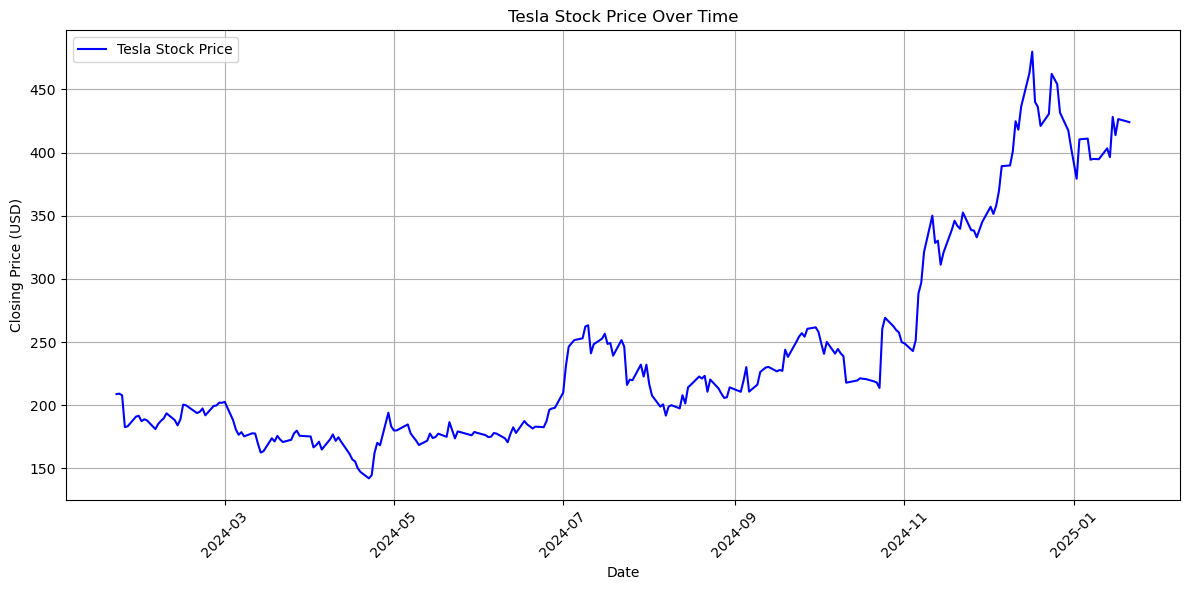

In [22]:
import yfinance as yf
import matplotlib.pyplot as plt

# Fetch Tesla stock data using yfinance
tesla = yf.Ticker("TSLA")
tesla_data = tesla.history(period="1y")

# Reset the index to convert the date from the index to a column
tesla_data.reset_index(inplace=True)

# Check the column names to ensure 'Date' and 'Close' are available
print(tesla_data.columns)

# Define the make_graph function
def make_graph(data):
    plt.figure(figsize=(12, 6))  # Set the figure size
    plt.plot(data['Date'], data['Close'], label='Tesla Stock Price', color='blue')  # Plot the closing price
    plt.title('Tesla Stock Price Over Time')  # Set the title of the graph
    plt.xlabel('Date')  # Label for the x-axis
    plt.ylabel('Closing Price (USD)')  # Label for the y-axis
    plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
    plt.legend()  # Show legend
    plt.grid(True)  # Show grid
    plt.tight_layout()  # Adjust layout
    plt.show()  # Display the graph

# Call the make_graph function with the updated data
make_graph(tesla_data)


## QUESTION 6

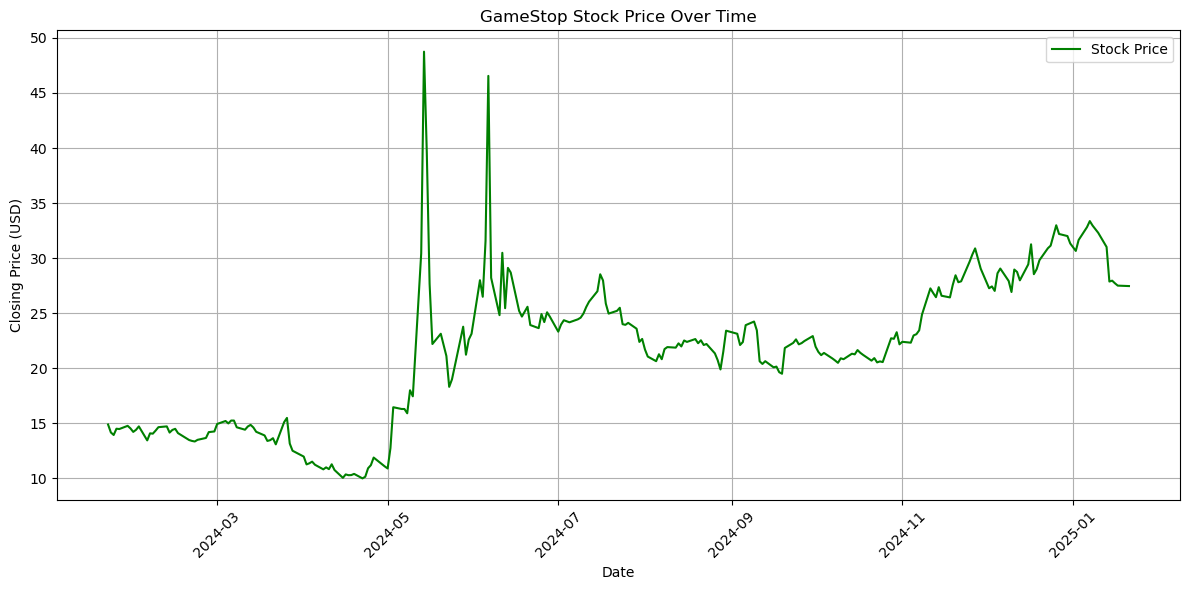

In [23]:
import matplotlib.pyplot as plt

# Define the make_graph function
def make_graph(data, title):
    plt.figure(figsize=(12, 6))  # Set the figure size
    plt.plot(data['Date'], data['Close'], label='Stock Price', color='green')  # Plot the closing price
    plt.title(title)  # Set the title of the graph
    plt.xlabel('Date')  # Label for the x-axis
    plt.ylabel('Closing Price (USD)')  # Label for the y-axis
    plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
    plt.legend()  # Show legend
    plt.grid(True)  # Show grid
    plt.tight_layout()  # Adjust layout
    plt.show()  # Display the graph

# Assuming gme_data is already defined from previous steps
make_graph(gme_data, 'GameStop Stock Price Over Time')